In [1]:
import requests as rq
import json
import re
import urllib

### Scrape the list of genres from http://everynoise.com/everynoise1d.cgi?scope=all

In [9]:
# Scrape the html
genrepage = rq.get("http://everynoise.com/everynoise1d.cgi?scope=all").text

# Find the genres using regex
genres = re.findall(r"root=.*&sco", genrepage)

# Clean up the genre titles
# Spotify requires URL encoding and double quotes around the title
genres = ["%22"+genre[5:-4]+"%22" for genre in genres]

# genres = [urllib.unquote(genre[5:-4]) for genre in genres]

# print genres

### Token Function

In [35]:
# https://developer.spotify.com/web-api/authorization-guide/#client-credentials-flow

grant_type='client_credentials'
client_id='ac55f11915aa4ce3826fca6897df74fa'
client_secret='ec2ddc33d12446b0a9eb3b6e2608890d'

body_params = {'grant_type' : grant_type}

# returns authorization token for API requests
def getToken():
    try: 
        auth = rq.post("https://accounts.spotify.com/api/token", data = body_params, auth = (client_id, client_secret)).json()
        return auth["access_token"]
    except:
        # keep calling token until it is acceptable
        return getToken()

# print genres

### Extract tracks from each genre

In [80]:
offset = 1000

# list of tuples containing song title and id
tracks = []

# should I try to reuse each token as much as possible using a try statement
# or should I just request a new one for each genre?

# returns 20. do we want more or less? 1522 genres * 20 = 30,440
# top 20, then offset of 1000 to get bottom 20 from each genre
# top 10, then offset of 1000 to get bottom 10 from each genre

# how should we get a good mix of popularity?
# at 5000 offset, most popularity < 10
# at genres[300:], most popularity < 60
# at genres[1000:], most popularity < 10
# url = "https://api.spotify.com/v1/search?q=year:2017%20genre:{0}&type=track&offset={1}&limit=10".format(genre, offset)

# some deep genres don't have results for offset 1000


def printTracks(tracks):
    for (name, (id, pop)) in tracks:
         print name, id, pop

i = 0
for genre in genres:
#     print "\n" + genre
    print i
    
    headers = {'Authorization' : 'Bearer ' + getToken()}
    
    # get top 20 songs from the genre
    url = "https://api.spotify.com/v1/search?q=year:2017%20genre:{0}&type=track".format(genre)    
    top = rq.get(url, headers=headers).json()
    
    # get bottom 20 using offset
    url = url + "&offset={0}".format(offset)
    bottom = rq.get(url, headers=headers).json()
    
    # use a try except block to avoid errors if the search result is empty
    try:
        for track in top["tracks"]["items"]:
            tracks.append((track["name"], (track["id"], track["popularity"])))
        for track in bottom["tracks"]["items"]:
            tracks.append((track["name"], (track["id"], track["popularity"])))   
    except Exception:
        print genre
        pass 
    i += 1
    
    
    
# credit to Stack Overflow for this method 
# https://stackoverflow.com/questions/29563953/most-pythonic-way-to-remove-tuples-from-a-list-if-first-element-is-a-duplicate
from collections import OrderedDict

# convert the track list to a dictionary and back again to remove the items with 
# duplicate titles. By reversing the list, then reversing it again, only the first
# (and most popular) occurence of a track will remain
trackSet = list(OrderedDict(tracks[::-1]).items())[::-1]
    
    
# printTracks(tracks)
# printTracks(tracksSet)
                             
# https://stackoverflow.com/questions/27554994/spotify-api-authentication-with-python
                             
# print json.dumps(resule, indent=2, sort_keys=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
%22deep%20funk%20carioca%22
127
128
129
130
131
132
133
%22east%20coast%20hip%20hop%22
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
%22deep%20german%20pop%20rock%22
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
25

In [83]:
print len(trackSet)
printTracks(trackSet)

30527
Mercy - Acoustic Guitar 2lJOKBuPgR9vcD4PLxTakY 50
Garden 004MiktqrlEPng9SDw4N9d 47
Just a Friend to You 2f4FDuRjuV1yXfpoG49ABM 56
Nola 1 6YwBgKFHrIdo49ED7dEnIq 53
Dandelions 2eAvDnpXP5W0cVtiI0PUxV 52
Inspired 5IEyHbUpYOZV7u9nB2DtI5 56
Rather Be With You - From "Descendants: Wicked World" 0EjIlKM5DczgGdL2fXavYZ 48
You Already Know (feat. Nicki Minaj) - Interlude Version 6jMT8jTTjhkP3Vzibs0mBk 54
Brand New Moves 1Yoo9sSZno94wpIuiknvoE 48
Makes Me Wonder 4zwZhQnqJTr1rQ9wRY3nNr 48
Like You Mean It 1qR73waVOTzDT4J6hzC8ts 61
Mad World - Eden Prince Remix 3unowsl4iCDDCYENUQK4Mc 64
I'm on One (Timeflies Tuesday) 7rHikwCdARPfv10xxY3UKf 44
Bonnie & Clyde 5oJsOnT92zgk7o0uZFf1B2 43
Swish Swish - Blonde Remix 7vd9Ya5TPTkplaxZNorlrH 44
Three Empty Words 1vfLwrJnjFAVo9wE78zKYs 43
Wild Thoughts - NOTD Dance Remix 1LbauiKQcuWyxVeDf9YcQv 55
Paper Love - Billboard Remix 47qIKn6MiiMUW80oZ9vW6E 45
Honest 4Y46EWgFZylXgqGfEBUEt1 43
Watch Out 3reioH6nZ4rQCbscqVwJt4 47
Our Tears 6SvIxa2qm5bkp5w7AvOMBu 54

Silver, Blue & Gold - Remastered 0xHedqbBe4sjcoik6FBIMr 23
Rebel Rebel - Live 7w5c1szCnFOaYPB9T8ek7A 31
Genuine American Girl 76wv4s7OfSHqyX1qFUeVMr 23
The Actor 42Xzm72hqfrRVbtDCm0czj 22
Roxanne 6FtLtT34WHec9hiBEidh0q 23
Give More Love 1yuiYyN4NL4VBeLCqQyAWG 24
Cream Puff War - Live at P.N.E. Garden Auditorium, Vancouver, British Columbia, Canada 7/29/66 2FUUypfykkhn0BIgKBssqj 22
Touch Me - Remastered 1K7GUfbEtGjNifXHPG7k7B 30
Dawn: Dawn Is A Feeling 5rjs20Ufm7iSGgldAwEgDt 22
Do You Still Love Me? 0iHR4R5G3eMY595B4IvXfA 46
Burnin' Sky - Take 2, Alternative Vocal & Guitar 5JggFnLjvT2gWyPlXWm296 25
Wild Honey - Session Highlights Instrumental 28lk97D8drlC6bKQmilWHn 23
California Girls - Mono Mix / Live / 1967 5n3YcoUvrQT2fZ4rRkBVSp 22
Still Thrives This Love 7JuhqTq7W2BvICMiGQkbK5 29
Outside Myself 2rZwPoSaDPri3GN3ZqKsBZ 29
40 Years In The Wilderness 6JY3wS3qWsd3gy4dzDYgKq 27
Rhapsody In Red - 40th Anniversary Edition 0phcqL6lgVOE10CHujFVkj 22
Dream Baby (How Long Must I Dream) - Live 2

Move Bitch 66p3t9XiuUCCSfNtj8JBjN 15
Guap 3kgS1U41bqLOPLMjuiqzJA 18
Money, Power & Respect - Club Mix 7xHXQzEy6gRImvbE2Mgohz 15
Young'n 5Lk3NxvTFqFxRa8SzvvGVe 18
Craving You 2d48mamATjby7wgPjdrSOQ 78
Marry Me 6V5h5PLP2FY2vbqjNihR4a 29
Stop Draggin' My Heart Around (lLive) 5jEWaUaEY8ZPCOlQjYBekf 21
Here's a Quarter (lLive) 5j2s7rodosGDJrgxgQ4u7G 20
Ten Feet Tall and Bullet Proof (lLive) 1ThGTDcfAxpjIcCN6MLJGG 20
Where Corn Don't Grow (lLive) 7tZe8twtuY6Ph55gQG7Ueb 21
Too Many Love Songs 49Hd0EvFfcTksIzR2I8Muj 18
Somethin' 'Bout A Truck 2WMc6JkGejC0tIk59A87Rc 17
Travelin' Man - Live At Metropolis, London / 2016 / Acoustic 1yk8jsaraJYFeExllsPFMF 18
Salt Mines 7Dd4ZhWcuqjTw0DalTyn2F 21
Diamonds Make Babies 1RSMcOZtuflDM8kFZ8oCDN 20
Betty's Bein' Bad 1EgBLDwqY0JqRi8irGDW8Q 19
Drinkin' bout You (feat. Matt Hillyer) 3L2C97oi39nSp3XU7COtrJ 18
I Like It Loud 0aSlgZlIUJhiJwXtSgAWt5 19
Sometimes She Forgets (lLive) 0WmEJAuLQ35pRq1keJWz7M 20
Yours Love - Live 3lag2tAblVFtmGnpMt2zvq 20
Worth Killin

Me Dejé Llevar 3paOSlqrFcMhdGDZ5513AJ 66
Corona de Rosas 6mdO5yKXfg93yFtbzrvDSw 62
Que Se Canse de Llamar 2Ef6uEWmlcCSaZD3hBpkIF 68
Si Una Vez 5aLUjqJ9OieO28SWLh3bVn 42
Los Vidrios Ahumados - En Vivo 1hZfOl8I9OyOaATTgJrhc9 31
Impotente ( Primera Fila ) - En Vivo 1emM6DhHiXjZKCCKJpqr4v 28
Si Te Acuerdas de Mi 4wCUO9XtYdKmTcbTxZoS5X 29
Copa Tras Copa 1yrEpTf0yIRN9ijMkYzzAq 30
Ojitos Negros 4SikjGjAN0WGl6w40DjIli 30
Pelotero a la Bola 2jTXWR5kV2xwmXCpLKo7YI 31
El Arremangado 6WxItIFIyqEpGzP3a1KXFv 30
Como Te Lo Digo 7cDhe4TVx9qAVYJtSt4XBh 28
Una Semana 6fXUuHjv5NcI1GHJDeV1dI 32
La Vuelta 5ySEOgW8NCvCOrWDJUNPIx 30
Andamos Al Millón (feat. Distinguidos De Chihuahua) 1yN3L2LgqDTOz3DKIb3Uee 33
Tongoneaito 79xsIkwajvRqfy8JRNP11F 30
Aunque Sea un Momento 1o6DbeEFaJjs8yxbqsFUiN 31
El Cartel De Los Pesados 2qw2eNnF2GVO3fYb2G54C7 31
Corrido De Juan Carlos 7s9cIsrRbEcEWneOeZ6Dtx 33
La Más Deseada 4C0jfqeJyFwFbNEuQ15tzB 39
Comiendo Pupusa 0Iyc0Kk3POzhdak1nLmUO1 29
Aguaje Activado - En Vivo Auditorio

Story X 05vX74B4EZDtfLBvgpXsXz 48
Réseaux 0HKNlsZ0zFlSqUqWj1nVVG 54
Chasse à l'homme 518c5Dr5EmpzACX268Aeqs 49
Je pense à toi 4vEaXY95aExfle99vJgXzU 65
Madre mia (feat. Ninho) 37YNulvDhyzULfhHycmhEl 73
Afro Trap Pt. 8 (Never) 7oL6unIlRwr4oGKQklovEc 42
B.O.C 1sdj8n5aLmtrevu1DscXVd 46
Snapchat 5xiRl3DIQAUc2jDMfpczAr 46
Bravo 1jR1IgIku9uMN065DLrhlz 42
Versus 1FGnCZZsr4kGcQmObXZYQJ 46
Papa allo 4W2bHA8uobtZEABLKUvIgy 40
Ah bon ? 0sMDNeNOKE2xdsbdqqjaeE 45
Du bout de mes dix doigts 5wSHe3qgCz1Mw89Q8hMEsY 41
Brûle 2dl6V5HK7nXUWkP7BY8Rdr 42
Svetlana et Maïakovski 2ye9MXEw8QaDeT2Byemq1c 41
La terre, je la dévore 7L9H1uaATxt6nWJ8mLjNWi 41
La vue du sang 1rg7pYNseFkecI1swIML9t 40
Promis j'arrête 3XlkujSL7xfZgWUGfwFcdJ 41
À nos démons (version jour) 4bVB397J80WptEnuN8o8nI 40
C’est pas fini 5cnCS7rTHUtZTg4NfLAzHS 40
BoosKaaris 4 4gx1E1faexbfY5k0bj7YSU 15
Booska Hooss 3 29uoJLhbnu9UEXhtrdzSzO 15
Habitué 2dtyfUXh2ghlHqyODxmhkK 29
Foutaise 0JbmzpjVdNuHky2WfHoL5i 26
A.T.E.C.T 2ywv2ofhd8GlkMrHpbF7rO 24


The Sweetest Days 73nUgsGJYjk58gycjs4gFo 5
Giving You All My Love 0GHaKdKhL3RvK5WQByCUUN 3
Nite and Day 7bLvM0TbuUfsnCAlKDeBCZ 3
Too Gone Too Long 7ks77ITwlXgHCPFv7ku5ZL 4
Hands Tied 3odc2d7Ljh6SPrrHLbtTIW 5
Casanova 5ouLeJGaLqgAGuCbT6pcnJ 3
Put That Woman First 25bUcincyixyL4JGKSI2v0 3
Ain't 2 Proud 2 Beg - Dallas' Dirt Mix 6NDizqAGAHvvNmo8DKJmaw 6
Ain't 2 Proud 2 Beg - Dallas' Dirt Extended Mix 4MdkVxENTSZGNXZizGriJw 5
Ain't 2 Proud 2 Beg - Left Eye's "3 Minutes And Counting" 0hx8jwt9bbi4O12VXsaNE9 7
Ain't 2 Proud 2 Beg - Ben Liebrand 12" Club Mix 3tKsLjOuh8v5fOWmRjjEVO 9
Hat 2 Da Back - Extended Remix 033Q61RyYMONKZERaf96jp 5
Time Marches On 4GuY9QJIk8uosZxiwikNvw 42
If the World Had a Front Porch 7AW2WsM8dc5pmXIgdn2SpC 41
Can't Break It to My Heart (feat. Jason Aldean) 3Sa7Dr18pTV19t2ofwv6CR 41
Can't Break It to My Heart 0hMOKzV9SyYEYGP2D3ba8M 39
Still Not Dead 30dIbe1zV4orwzUtria9Np 41
Mirror, Mirror on the Wall 5qiyl0XVXnZDkWojBhOC6U 15
There Goes My Love 0JWsEqz13ofOeVrVq58ba7 1

Pop That 28R4frnILFomKqKA2vf1Uu 15
Backyard 7GiPLBcvx92ir8HOZd6I5q 15
Already Home 0bBINbeMsKvSiHF4CDin0n 27
One Foot In 4PiHDArK11S9BjpoJ5haij 36
Not Your Girl 0UhI52Q91Ir7HmebvJ8f8E 31
Feeling Remains 7Kv5dtowaK4eV9GGr0a5vE 37
PCP 2zcRuwCx5P8tSJEbdmId9a 24
Ballad ¯\_(ツ)_/¯ 5hlZ4shodtJ9KuZx1nSMnM 12
Sirens (Parts 1 & 2) 4TxHg9O4rxTB4zFwInVpi1 38
Cool Parties 4uCKum8h6546z8oIH2awmq 31
I Wanna Fight 6drhbGlB4vqo2n2wtw3SQf 24
Íkaros 6JJ0RLLf0nqZThH8A3UpK1 21
CMMNR 3R3TBatBQhPqYdui99Nebd 22
Not The Lonely 2RSQoQpMtbyGO9QBnLqnj5 15
Know Better 4XHcIgELnhynPMUfA1ODzt 33
Back to the Rhythm 4LSE2UfvxJ1WYLl1uOxWGH 29
Know No Better 6BKeNWeUqxmvQ09Gxd3ZGX 75
Run Up 0SujigeT7cxuxBfhN3eOcp 67
Say Less 4ECGg8etqdYm5dozPxZ6Og 38
Know No Better - Bad Bunny Remix 6xEWhl7uGpNdLRDLenjphL 66
Caskets 0FknXlaOeXD7Vto1Hx9wtP 65
Watching You 265yhmmWClZfBmgNPzwOMP 70
Embrace 1a8ohxTDh8O7XFUY6W1IMK 55
Can't Get Enough (Carbin Remix) 4iBeUolnmGncnsdtQgwTvq 56
Reims 3JtEYjD09uN9kKFBDw60Wj 55
Mosh Pit - Krimer 

When I Get There 2sKTYRCgUHXmIhI2hoBuZE 61
Understand Me 6u7jM7ms8eiEIs2G7DANWP 66
Stay For It 69Lq3BWssbLhf4QDRtFY51 63
You Might Be (feat. Lils) - GoldFish Remix 0JshnWfAOhnJiob29TL7XO 65
Navigator 1IUWIwZrxpyktrxGqI7FN7 61
Navajo 6zWU7YALeEDMcPGhKKZJhV 65
Babylon (feat. Denzel Curry) 3Z3ANEnfT5iSJrNFJFHLQO 59
Status Busted 73vdaPfKiJ4OhJZzm1HFjG 26
Calendar Project: February 0W1TQGbHPVwhjbytoLhwZT 31
Alien Party 3g0Qk1H8uefkXnTbAMm0iW 26
Drop Down 3Rfv6E0LljKQgSYxhCaXWc 31
Way Down 2A64H8yfFoTbeuSLTijfT8 38
Neukölln 0egYl0VzzQJbhHRm3JUBQw 24
Melancholy 0AczYR0dyqtKlmLl72OoIC 25
Rolling Dice - Muto Remix 3DHhstU99mmD8xpFmbvSKj 25
It's Not Cookie Time 6zh4qY4z4uVrmw3zyqkJla 27
Scattered 4RX95erE9lv4uVNOyteli4 22
Nobody Knows (feat. WYNNE) 5qwlh4LPRLpavBvXwEjDfZ 26
Fad 4vAxMgaZfmRej6IhHEdGuV 27
Get It All (feat. Emily Hendrix) 3pbhvQYvTLyy6fC2uW3Yt2 26
In July Focus 5TVHAlsU1a2Z5NjqBPG3SI 30
Another Parachute Ending 6ZlB40zfpBsiYvSHxOdC12 27
Stand By 25poOHTp62YFzu9E0V2RZA 32
Time Will

Piano Concerto No.2 in C Minor, Op.18: 2. Adagio sostenuto - Remastered 2013 7uKh2IJiqVctiKav92Ztsl 15
Piano Sonata No. 14 In C Sharp Minor, Op. 27, No. 2 -"Moonlight": 1. Adagio sostenuto - Live 0kHsJd5TyFHX5xouK7JdEw 16
3 Waltzes, Op. 34: No. 1 in E-Flat Major 5qSKwGPFw2xG2vgasA31kp 22
3 Waltzes, Op. 34: No. 2 in A-Flat Major 4zLQq0UevbDR6xVWBCOozX 23
NYC Medley 2VVtK1GQmgRMNlD94a9Umc 40
Ottomatic 2xxCF1zsq3irWmLvBCaTAw 35
I Dig New York 0LlXfKjnUhErE8ZGoTy9a9 36
This Is My Town 4o5q52JCSJkTiHCQKHjCJy 35
Wherever We Are (feat. Elohim) 2cGSRqzSCGRqxr1OOKDmnn 33
Funny How Time Slips Away 7ae368i6qGmRaJLbRysVbe 34
Heterotopia (feat. Yelle) 0itnOxZv0jVH0E6PaV02RR 33
Last Forever (feat. Sam Sparro) 41o2QE25SjZupiapjCQyQA 33
Blood Type 723z86RG6rStqcEEmzoNfN 37
Falling Back (feat. MNDR) 3w2TWgbieJT4uhgzdw6q1h 31
New York City Rhythm / On Broadway 1EADSCsoiZ7pkWrNKxK7gX 33
Adiós 5JQ1569FV3zip47EL5K9h9 32
Everybody's Talkin' 7azrk4Up422LCe0env1wog 31
The Brooklyn Bridge 07rhb2Zrjq071xSQ2n0x4

The Seven 30V7Gxc9RMDRlBNJmsLVth 42
Dear White People 08WXowZB8S14mMsCXnLQuu 47
Looking for a Face in the Crowd (From "A Face in the Crowd") 3yamuQIlDnatbooqJTdVXc 0
Sex Is Better (The Sexual Revolution Song) 2lKNIbjOKWqLEUyedqjszL 0
There Is Nothing Like a Lox (A.K.A. We Ain't Got Lox) 72bz0d0jvJxbUtoR6Gvj3p 0
Short Songs 40eQPc877yPCo0ngh5IBXk 0
Give Me a Cause (Gimme a Cause) 6kGxbdfDhFeAcZd0zISuWJ 0
How Deep Is a Birdbath (A.K.A. How Deep Is the Ocean) 6VpNmtsAwtWd1oSNzWf6xP 0
The Girl from Nymphomania (A.K.A. The Nymphomaniac Song) 6GldD9cdADTbhFAXSJoxDM 0
Sexy Songs 5MrFcrh5j61W1sAHixYKVu 0
Mononucleosis Is the Kissing Disease 7JnZBfHXbPSPK9slcWRZjF 0
Sam You Made the Pants Too Long - Hong Kong, China Version 0n2aW6wNCACXdIOJHGI0qs 0
When You Walk Through the Bronx (A.K.A. Walk on Through the Bronx) 7mNlzUE9ogP4UliQ97BdZO 0
Laarge Daark Aardvark Song (The Large Dark Ardvark Song) 23LVslhNCnIxJXr5B4UtMO 0
I Was Never a Nazi (And I Never Knew Adolf Hitler) 6m2P9cYYa5ZbtUrRK0JYun 0


Rot 5Li55mTSEPkvo1hNDRrHjm 6
On any Given Night 6IFVSdnEtB2otOK7P8GCTF 13
Straight Hate 5qODuArQH8m8JrpZBhLBrX 12
Bruises 3zKaTnmiSykpk8U2ge5eVI 7
Side With the Guns 2jI5A7WPjac3RRChshHbTC 9
Fuck You 7hYjlGySN5JW6RXH8JbphK 10
Ich will Dich - Radio Edit 4QwqXgwQzvjlTfeYsYjjEU 0
Kisses Taste Like Death - Anvil RMX 6ZRASeX45InU4yiSgysP3C 3
Still Believe - Sucker RMX 1CVqbSQtgrP45NRUk5f2uj 2
I Don't Mind (American Mix) 0HjZFZP4jN9e0x2rvIElQH 0
I Don't Mind (Instrumental Mix) 5wSlyEKGhbeQYhcKaB9ty2 0
I Don't Mind (No Logos Instrumental Mix) 02QHtW31dRKosIJtEllNJs 0
The Act 6eZWiwOa3MFRxTOA5vLojg 0
The Act (Extra Dirty Mix) 3mjfb47pFtsnRIMLoxV1f5 0
FINANCIAL$ 5lZW1LfQK89Or1GyO5zrhq 2
Room of Nightmares 1pwuYWkhCeL248qSbRDcBI 43
Enter the Arena 1IHWXcm71cK4LVJ9o7EqLS 3
The Scalping 4ijD28jzmzk1stdUDRWZX8 4
Ancient Hate 4Fjv4yh2DE3uLuMMIG0Ezv 3
Black Kings 7DlhUdMYf1810inClvlZSV 0
Last of a Dyin Breed 2CK3nYsAG7V9DUwsNIaqMM 0
What's Goin On 7CrdWJw4C5AMb9tZHFtf9G 0
To Listen Close 0xztV83eQ8X7

Intentalo Tu 2gNvLdwnJnugCIsmwys3Tb 10
Dale Vieja Dale 3ilsYQV58CAdhmQuDjke1C 44
Dale Su Mamá 4FYXeIWoiI1mXBcAZmVKCJ 10
26 2EcQY09CYgJ1qk6H1qZf8h 65
After The Afterparty (feat. RAYE, Stefflon Don and Rita Ora) - VIP Mix 0CtVbAqF6EjgzcWxEiuxOi 64
Easy - Music From The Motion Picture Baby Driver 6D9784CzwRHlnIHdtjsBME 52
World Away 4hRz7rOTUet8jJpXgWvoXh 55
Gangsta 0YxWNhkNfVF0PHDg3zOEEf 49
3AM (Pull Up) (feat. MØ) 4R2u9nFjSycaZsEYAe5Kc0 56
ILY2 1KPS1MHPrq9uPklJX8Q4XW 52
Boys - DROELOE Remix 5coBVo4lFeK49XTArYiJPz 53
Lipgloss (feat. CupcakKe) 7niKxzFThgRf5fXlIYdjtZ 51
To Know Your Mission 0u5bIXVdk8XYXt0zfM5Kuc 38
Painted By Numbers 2ehK3FMuH7KWtstDAGxkBP 27
Porcelain 2rToNvCK0ob2kr53sWfsjZ 28
Living In America 6kh2l6pWJlAgGYfGQJhuAv 26
Bad Taste - Bonus Track 52cGUaQIgTPigbJ5PdOK2V 35
I Know It's Over - Demo 6lRTk81kAdFK4MNiXuCzsR 48
Charm Assault 4HPzOaFGfVyrf2hiWsv9Ft 34
My Name Is Ruin 2KPewERHYuJsAZAMmuJTKB 43
When the World Comes Apart 7nchujNTu02CcfV6FhbveW 19
Bed of Thorns 08R85i

This Is My Life 5nrdrOIcWwE2STnbSw0xO5 33
My Love Is Free 218jpnGxdkE9xcDHAAIA9Z 29
Word Up 0leHWoQ8PMtTxgdqgACatc 26
Don't Explain 1aOR8q1JURboQmSxZMBYtt 34
Do Whatcha Gotta Do 7CfrmAcrImgHI58Z0S13q9 30
At Midnight - Single Version 2JRZTM9DTXT9bRAS4xclu6 0
From Now on 3gn0gUi5gGhraHaBlk7tH3 0
I'll House U - Hatiras Remix 7l7ujQoSRBDm622Niix6kj 0
Sorcerer 1s6w6d42DApGrzTsifqWz8 0
Classy Lady - Remastered 1KHegRFWyJBxYHBJvkTn3w 0
I Like Funkin' With You 6aMCHRM09iThi6M8h3xslg 0
Everything Is Cool 7v6C5UhwRpoQVtghAmZIe7 0
Le Freak 5qG2NLlUFcuLqjAPGJK2pl 0
Do What You Wanna Do 52ZThMWhs3m9UlCLSJ8qaL 0
Can't Let You Go - Yvonne Turner Main Mix 6UMZJbU8HF2XMYZGDIuw87 4
Can't Let You Go - Louie Vega Roots Mix 5LU3BO61YzHaJ9TcPZCg6a 5
Destino o Casualidad 02IJFWVjLSM811RsySQusA 75
Entre tu boca y la mía 1n4Op1w7ehOqeGw3q0Zy0C 61
Míranos - Versión acústica 70H7Wj19PsnNtTDqJSIrAQ 59
Estoy Contigo 30sfbddp6p6Y33VCSf8QPQ 60
Invisible 6OocN63GLU7NF0wHdewhID 68
Míranos 6lJTu3WfVaQ3ErZtKCmr9L 63
Tod

Champagne Corolla 1jcNegxP1DyAmpb5ysoCPW 28
Get Tight 2CDv4O5IHklJUjVWGIhS4q 43
This House Is on Fire 6gfXRhnvJ3SpEQ18s3s3IW 44
Coming Down the Mountain 43bkejyRlzXjVGKvXYLHzg 50
Train Go By 04StiARlnLW2s0nGEMqqLs 44
Lay Down Sally 6CsErGW5cD7raTGR3Zs0SV 42
False-Hearted - Live 1IIxN0wU7OAgVK3RPzjM5f 12
Amazing Grace - Live 6ZtqHQto2anDoWKzx0I8Zr 11
I'll Remember You Love, In My Prayers 4bUxvNSVnjmDQXDy6ltrsd 11
Lift Him Up - Live 6Vflcl2T6SJGS0AnCnwZH6 11
Wild Bill Jones - Live 5WIELC7cf7MCMFciQYJv0u 11
Hemlocks & Primroses - Live 5vgWhn3LgQjPD7ixL6QNzj 12
Pretty Polly - Live 2KSnRKM6RnXPithZfZEieq 11
Man of Constant Sorrow - Live 1jM5ZNB4rdn7mo9dusxW8L 11
Henry Lee - Live 5fvArjJHU8gyBmTc6RRh0V 11
Calling You - Live 5n5CVKX3850YXWfLsQYJsg 11
Great High Mountains - Live 7LnRvHGpvaH2yvz4zBt3l9 11
Look on and Cry - Live 7bxiLYDVkKbLY1johlD9SL 10
Foggy Mountain Reel 3mPcvA4bnOgr7slCyDXAdK 0
I Wanna Live 1FSkYKfi3rDwJLoL0JEt1A 0
Rock Bottom 7JDIZbPUFHhNTrOASTwyXY 1
Prairie Day 2p7VDHvReO3

Jida 6peEYA8gU5JjfheNNGDIa6 13
Era 4kN4llNxhk9sHZGPE9m1vd 25
Dungeon 5ho086WjZ1vgJjzSEH9PJu 30
Submission 1ZctSLFOJC2Sjh4Vr14DYK 9
Xylo 7aCUqzRHJMHV0UJdCyva0M 16
20 Seconds To Mars 50Ln4A9Q8GQBq8dqWT1PN8 19
Neurose 04YASbsm0vzqRAYyMyDvFU 19
Most Busride - Original 38SFiA3SDfjOvXXyWGEcYB 15
Forbidden Orchard 4Rurt1GAhFXxlgN2gKqlzl 14
A La Vida 1Ha44oB2mHyLbP0yHMQOHz 16
Keep Your Name 41IcdEHjwDp65pVjOxODCf 59
Up In Hudson 0A4yKvRLnSxGcEFhAHjdwW 56
Kinda Bonkers 3YFR98QWOHyiryblV7K2Pw 52
Cool Your Heart 2qsYkMBBRTqlSSifKTDM1F 51
You're Dreaming 7sVx2NqRMGTWzv6j95gUcA 51
Judy French 7f4MQxuZWk6iMI4KygEC7P 47
The World's Best American Band 6aY6t83W5GNvYjoktV3Kqf 44
Dragon #1 18QbVo1ERon5JIzdKWnFj2 6
Golden Bridge (demo) 3S8d73FdDDQb8LSqEA4Ju4 6
Mescalito Pt.2 6wRaC1hennR90XWQNIQ3yl 9
What's Wrong with You? (Death) 6V4IhxjtnFQC99cUXIpKM3 6
On The Way (To Oklahoma) 1aNUr7wiB6prYWS9GDGrSk 8
Blue Rosebuds 02lssT8pOu5f0eDE0mXaoY 8
Eloise 4poGtosLOw5dugkayB8qBP 7
Moisture 6D5BDU1UAdJpGOGBy2xl6w 

It's Up 2 U - Toly Braun Remix 79wiOou31oEbDTyF6xGvqy 0
It's Up 2 U - Juloboy Remix 3ykPiKLnd8GwyAehcQEDAw 0
It's Up 2 U - Deeperfect Remix 0P7jRW5Aqwjnmb3H0bCnDy 0
V For The Love 6i6nwfu1SOWw8E2S9BqWxw 3
Catch the Moment 4Bw5inMgxG9gAY2sCcw79n 47
Datte Atashino Hero 1hP8CqEdjSzUHQAP3aXsKZ 47
RAIN 0ebezFH7RrGwMwJC5MQ4XF 43
Crawling 2QWzMJQzeAfkUggriZJWth 43
Rico (feat. El Fother) 7BKSQsececxCkEdYOxFQ90 51
All Goes Wrong 4pfu1lEKJhRGTQf64cQPXd 38
Real No More 24Jp60KyCgwonIGiVTpW9j 35
Her - Zero T Remix 0HahG3Ob3hLdppy4iSnRzB 11
Don't Dream It's Over - Chill Mix 7I1k2880cgqQp010LfYhEk 17
Slap 0tI3dMVqbJOfFmGAs6X7BE 13
Fappy 4KJFEX0FBkRIeUiCPN7m0P 19
The Invaderz 5vZQsFR5C9s5cz4hIgp6GX 12
Uncalled 56IQGM8Pyj4gj6vUIWvSPx 8
100 Porsches to the Stars 6hluvcv7Ct7KwPm8xtynoe 13
Digital Life 1CXxJZvDrj6rLYTPkySsOH 12
Cold Killer 0uvdv2AgSmme25O7tsC5z2 20
Maintain 3ayJghLme7tnEjB3KpkzmX 18
What If - Ed:It Remix 5HxyAhQw2MwosHdNPZyFhw 16
Sequencer - VIP 6ZBaom0lCzN0av9Zc21LRe 11
Wash Away (Calli

Three Days Straight 0nQhuTEktWvXwbgMyk2uSl 9
Individual 4gJpGnUxlgdfHJCkgd9GGp 11
Roughed Up 4OeNRI5iN7kUJodf5f6ETw 11
Amber 52PsGw5B6Ybsq38Oq186Tr 11
I Should Live in Salt - The National Cover - Live from Spotify, London 1LF3VWJhOqD2VuuruLMSmu 48
the gate 4efmalCNEsGzNdLoDbuLuS 44
Shed 7tdxlKkxrBzCu9fD2sAvVX 50
Unbound 7yX1EVNRDaWZMTDTFPK8fn 38
Blurred (Bonobo Remix) 3boO8V8sT6jSktZpRHnsdb 46
Blurred 28u92L77wqbWYXMnw0nPIW 59
Jarred 26sM3JtyHBYH2b4owBiSki 46
Afterglow 2TSoW5yFz2hO9lXB3xmEQf 32
Paused 0ksBw6NWj0kycNs58bd3cy 47
I Know You Know 2H2egs0Gr1dZi1DC85rxnk 31
Unbound - Live from Spotify, London 75zBbNqBhPjsMd8UY3k5B7 31
Prayer for Peace 2bwoElQUAPzi0bG9b50NhH 29
Creeper's Blues 7uZWfpGCi5NmZ848w4GJzd 0
Married Woman Blues 0BQSDsC6i4YNCc6uRTFQdM 0
Drop Down Mama 0hMvZNZiXKFVnvq3faaiUw 0
Airplane Blues 1kN3tE5IWkVlxbl4MSplui 0
Liquor Store Blues 5zOSpUlMhTIxNOXTGQCn4Z 0
Brownsville Blues 2fhZkWLyXauNW4PsRdzYmx 0
Mailman Blues 25Ae5JbNZp2oxY7ZzphOaA 0
Jailhouse Blues 0KazpzFtTkbN

Guanabara 4ravLPLEKnaLLhgPDLK37s 7
Souvenirs 0lFMBOR7R9uiwMEGQCgfzu 2
Pigalle - Die große Mausefalle 3ewqG79Hwhcedl0RZdr6BP 1
Ohne Krimi geht die Mimi nie ins Bett 798L2XHDXE1PzONoIBitzn 2
Café Oriental 7jgc0OnibPeCkHKs8jiJhr 2
Gina, Gina 3DzXrVlep1wHhCLYhPhUOp 1
Casa Bambu 5BHv7sH8Oloh1YuLomn3B4 1
Flotter Dampfer 3lsA4YbW9ypoWeUB1vgH3M 1
Maskenball bei Scotland Yard 1zMEZMmjygyFsyUKV6UGlQ 1
Wumba-Tumba Schokoladeneisverkäufer 40soPLQiquraix8uahk2ka 2
Bom Diggy 7Dhy1R9NmD96wfr7VJEN37 60
Kudi Nashe Si Befikre 1Y8VmFic6EFOh1zKxlqdxI 47
General 1XcmeA4mhX5xxSWWbuHd1V 48
Bollywood Medley 5 23fXyZzVpdvIjuVmpdIf2u 48
Ennodu Nee Irundhaal (From "I") 6951yCfb9xWGpDvFvlGaqT 15
Kannukkul Kannai (From "Vinnathaandi Varuvaayaa") 56pvJajC82f5OWkHtwUJ5q 13
Pookkalae Sattru Oyivedungal (From "I") 2SSKpYIxQky3B9cVVNFwAI 14
Malargal Kaettaen (From "O Kadhal Kanmani") 3Lk0ttWam13zL5mnogYWmD 13
Yemi Cheyamanduve - From "Priyuraalu Pilichindi" 3IJhn2wRqiToqowwasOb5G 8
Khamoshiyan Gangunane Lagi - From "On

Ladrón De Buena Suerte 5tJfQcWoEgR45B6mxzocRg 33
Sinking Down 6rog8vv7luQw2w2pwhhrGY 44
Back Against the Wall 1JWqYAwi12yzh2UmoS4BcM 36
Promise the World 3urggtfB9IJN3kTmiqItb4 36
I Am The Cosmos - Single Version 5mwj5RppwAiMQawB5P0kCm 36
Cherokee St 5RFAXksYo3Odf6arMkILEv 32
I'll Fly With You (feat. Cary August & Rikah) - Fire Island Mix 0pNh2HiEs656qe2ac6zvYy 6
It's Time 6tgmXVNlON0FyZRPj5u6mh 1
Sioux City 0PG0X87Z4ZPs0QPJD4jqWu 1
Come Down Hard 4pwuKyOi26SYBqhUrQhtZd 0
New Gun In Town 0JKyFZSkNszH6nNYOPdDPN 0
I Like to Stay Home (Live) 2AHVGFqg5Ue3gxBOkpRaVJ 3
Love Is For Lovers 6vtCwd9NYsw3NdQpix4Hx1 1
I'm Still Dreaming Now I'm Yours 6aJsxfFFleW2JvQuu2DSnv 2
Non Sequitur I 1a0DhmZYvixzt9I7GSF5LJ 0
Non Sequitur II 0uBddZzcpERrJySxyfotgY 0
Non Sequitur III 2AF1GYIsXFqhUi3AyJH9xu 0
Non Sequitur IV 18dSGqDVy7QzfwtszKTZAy 4
They're Gonnna Destroy Us 1JFdPTucRmyW0fKFSjVWLJ 4
I'll Be Gone 4W1UNJ3ykNpaS6RhXWt60a 24
Born Under a Bad Sign 5DKbINWmAYt9LDRxerRnoK 1
Switchin' In the Kitchen 0u

Soch Na Sake 0WkZqq5SgGv0dOk9sgqgJj 48
Butterfly (From "Jab Harry Met Sejal") 5YO4nOP9W4fgQrV87mOtSB 46
Enna Sona 6bdpj89aYEBjhpsenXAsmO 47
Aalaporaan Thamizhan 1CjXSN6vgWmniOCEycVFdN 52
Galliyan 4ydGb4dUaW3SUwtfs4TwWR 47
Maacho 1L5jOr4vqumGibHTQtVwWq 52
Radio (From "Tubelight") 1uHoOcoy7BeARMDJRhx1xl 44
Maana Ke Hum Yaar Nahin (From "Meri Pyaari Bindu") 3tKGNet1OUJSx25Zu9Yqn5 44
Haareya (From "Meri Pyaari Bindu") 2IW3TqFoO5dWpdh73SuJg3 43
The Humma Song 7heMX7gyHP0mhTlNgd7Lxd 44
Mersal Arasan 2726Pd2GWM9mz65fTOMfPQ 51
Tumhe Apna Banane Ka 3DP8MAQoBoLsSE3fUbqLQo 42
Hawayein 0l6g8Z8mqGbGXFOjigYetD 42
Main Agar (From "Tubelight") 3kYlKr1xGsBS7mluB9W7AV 42
Beech Beech Mein (From "Jab Harry Met Sejal") 4PwjaQ5q9NwGhFXdmk5sU8 42
Neethanae 0aI4SOX8BknvAfOs607FlV 50
Samjhawan - Unplugged 6LmoCLtEFkwzSwtaRxfSHq 11
Surjyo Dobar Pala Ase Jadi - From "Indrani" 7A16thOiugLKQgVktHCOY1 6
Coffee Houser Sei Addata Aaj Aar Nei 3jmO2Y8T9dPIVuXIoydrTV 8
Aamar Bhalobasar Rajprasade 3OrhELK9TzSrpsvIvQpWh8 

What They Mean 4znEux0yWyNymqrjMDIWDt 36
Big Sky Country 25BCdBiSKWEJ49hoH9VJQC 42
Aware for It All 3pQZkAkWGPAZonujurwVqN 40
Be There Soon 2c55PmEXaW9Cs65K44Pxq1 39
East of Eden 7vHmwZyU04v7Kwh1hUfEpP 42
Telluride 1r3VTUEqedmiJHBHvjLKTs 41
Michigan 4M8po6ZyjH7zL2dyDS3EhF 41
Smoke Machine 5jzc8Kom8RR1r90N9SCZRi 31
Lost on the Young 2Hl45Cf4m4CX0a4slkR2qU 39
Don't Really Know What to Say 40aDCK9BkA9PJP6Qe2Zr0h 31
One Go Around 0JkFdM0LDvmoJrbtzZ0uET 33
Suddenly I See 01F6D1qUMGVKNYAi63D4yl 38
Steady Rock 4qabPWXYmTgayl0IFZmIpQ 41
Get Up and Get It 4KKLXmRB71huKAf5vS0t9A 34
Gonna Make Time Version 7HZxfbZtH7zSyFY68ZiX3q 33
Purple Version 4Vd56fJo5K2quHyljyptAC 30
Summer Breeze 4XoiAHO6eG5Q4oUZauMzLJ 18
Loving You 0pakFTA5U7dRLrWt5Do2LF 34
Let Love In 7aNenExBJJmOECJj1905P4 32
Make Me Happy 3zvfIDB88lhqfSAjrdwDjp 32
Chase the Devil 0bu5oNxU5pdQuFGxT4gwNr 31
Steady Rocking 3ysuCwEw1pXIwyr6YVvpOy 32
Wall Street 1vScxuyEa7X1HSP1HXLqZb 32
Zion's Blood 4VlSCWPCQhXUx1s0PZjzmj 30
War Ina Babylon

Anysha 5Ad2jPUxucMZzOnEUHEYBC 1
The Black Angel 1gnedB7MsnhoWwWdyxRlNW 1
Eastern Market 5GN9dXQKvMf6ODGSsqiOdD 1
Head Shoulders Knees And Toes 4fpVjYkuzmI7MiUVjA2EXG 12
Wir gehen schwimmen 12kstlaQLOPAzTm6MEYkik 0
Ferienfunk (Höreranruf) 53oQwXSCluCUSwsLaSapyC 0
Leis, leis, leis, wir machen einen Kreis 4XQKhhOmlKNjO6VnaMJDim 5
Jetzt steigt Hampelmann 3xCty3Yi2oHHUNPsWS57u9 7
Was müssen das für Bäume sein 1vZTwGrg4MHqI9zfuWTCeg 7
Der Schaffner hebt den Stab 1gSYV1xvMSaPdLQa8gyYBw 2
Wollt ihr wissen... 77CQWmAJk0mUhpqkPZNyeZ 13
Zeigt her eure Füße 3h2vAMCcqt9r3EB5SVct1r 8
Wenn ich morgens früh aufstehe 6yCugTvaoyKz8UiVAIXWzN 2
In den Wagen erster Klasse 19mUMIt8mkdQRGzmZxgF9N 2
Wir öffnen jetzt das Taubenhaus 37ZVuYf9xexU8tTJbbvQt6 3
Ich bin ein kleiner Hampelmann 37u3pUf9Mlq1cSN2LoBPOT 14
Klingelingeling, die Post ist da 4LMkmIGJg9IBngQvBU2gzb 2
Brüderchen, komm tanz mit mir 0L6ARqeXBtg0lmFO5N56UP 1
Schmetterling, du kleines Ding 2j9wLDcBwjz4cu83fz77xr 14
Der Plumpsack 6nC1J8Bv6m97IKko0

Jaula de Oro 3Wk5dEzS8BeiLUt4tCzZKN 20
Business 1H9dgIwAxU1CuObpvxnhey 3
Don't Change 2ZJKUMYlfZCA650wxtENfj 5
More Than Myself 1pSoaHqcaumgzcxcXGysAq 1
Executioner's Tax (Swing of the Axe) 1kbwEcixFWVj5dFO9Kso3J 46
Nightmare Logic 127fndSSTEZrx2TV8cd3jM 40
Trial By Fire 1RCbSCoy6zdrQadwCa3GTN 43
Waiting Around to Die 6FAJJ0rDPJoFRXt2LHjxWV 38
Blood 2uOb4zNJahkxtCUNewkY6t 41
Rebels with a Cause 1tsFyAQY9Und4f8Rmjz4iu 37
There's Nothing Left Pt. 1 6uF2Jr7rR7fevne1R82kV5 36
First Class Loser 6z6Pay3JF7cxbFyw6eS1z0 37
Paying My Way 6MSzeTzRq4ZMH4VwJs7XMy 37
The Hand Of John L. Sullivan 7aR0tgI3ijJ4qQlKglowYO 35
Reptiles (We Woke Up) 03Ve1nXbpvefw8U3uOcU5g 35
Life Is Good 4mGAnGqjlCmPjxvbvIOPsT 35
Sandlot 5WYVe8EJfeEuRUoFuC5vPE 35
I Had a Hat 4FEVRua3axKBWjjZAsXxcy 35
The Guns Of Jericho 04sfbAR7qComwTdey2XGtw 34
Welcome To Adamstown 0yW0hSvMcghoSfyfBD6Hx6 33
The Days We've Yet To Meet 04f4KwJ3JwPBQda5iIQ4s9 32
4-15-13 5gtYrencIPG36HDtr9EVvy 33
Crushed (Hostile Nations) 1gseBRxHWAAx6lckoGZ

Well Done (feat. Derek Minor) 0BUGTjs4kL5eiCzdxVeo3z 25
Charmed Life (Never Give In) 5MYf0UKYqdBQj3K5F30J9B 32
Izitme 6pziBSW93Flc1qp9u1ru3w 27
This Is Transcendence 0Cud0ByMo1Ufhf5cXIT1t1 25
Between Youth 6Pxm9JUzH0s5lr36oBVZ51 25
Jupiter 4PY7KuxSdMKwyWLu21A00Z 51
Of Angels 0qJqBcTzfVHWE0bT5TGN1W 18
Loneliness 2E3yHIUf45KFMvyE5Hum5d 20
Infinity (You Don't See Me) 0k7iyVbC2GelKveA8wM8A3 18
A Manifestation of Time 3s6j0gCtTppl6KDTp7qeJ0 21
Set You Free 5JWa1ncGXZvUmTT3K9QWMs 20
Comet 0Uh5M0Iv1CL60h7eiZG043 60
Starwood Choker 2w5l9sDXytt4lu0ZYFSoIX 52
Words 3PjG6Vrtr26ANkrnssYK0k 46
Sad Ocean 1yC5ZxdbyrwZrcPaBPtm4Y 47
The How of it Sped 2MgzMqK8ZA9XYGSDGE8j4q 53
The stars vs creatures 7rIYrgxKZKebDRozcULAL4 42
As Much as Possible 2FAhgExbxDIm5QkUeLvXNp 39
Scrapes 3u74eSOLB7Vv5G8sFMgnwf 39
November 2s0CjcUcmTkkuyPkSfVsXx 36
promised land 6L0a2NYfZrQdYDg4USdk1p 34
What Is There 79SNf5oyvqDHsIOkgUrp41 34
Children 5T3soQpYhUoog9bpokizA0 39
El Tesoro 0l6LVRTDNFSHVBsqQvMR62 27
Arriba 3fD9K7rYQ

Через 10 лет 1chrSDx4SQGGXHgytsPvDL 40
История 0arLd1RSAJ3vQn6SE4vCkU 41
Вдох 1NlIN9l0UrdtLG1Jnz7fUr 41
Vitamin D 2oN4q66KUcOnWO86FVyctY 63
Idealniy mir - North Noise Remix 6dguy3otpdfUVp9PqHJJSh 7
Idealniy mir - Direction of Silence Remix 6J8pFkBpk3u2yzEWE1QUkx 5
Спаси меня 6vusQOGdDQ60ZzOvV6c10W 1
Пролетая над нами 1Mk1NG80brYB81Br3nX9r0 1
Я поднимаю руки 7l3WtVSKPufXmPUZAkKtQj 2
Будет лето 01rO8C7dHHpftWBQFYmeZz 1
Ну и что 6RTQ3oeGyGahE6N1UMqQBu 2
Нежданная любовь 68D2aHaT7rqrCaNcOKGig4 2
Натали 5Xn4iWPeQzFCs2cmSIzrAn 1
Что оставит ветер? 4BnHpVuxoetAkjTyr3xyde 4
Таблетка 4FAfy7uUHecxznXZrVluO5 7
Опоздавшая любовь 6khJqlAroW2TeujzP6sYMc 8
Ты - всё 1KAoAkdXeFxo0uHFYkXPG3 7
Я и ты 3whsmE3yVbO4T1T9QY0YFJ 1
Неделимые 1BPmbzrcQBjKHlgED9VRSx 0
Сто озёр и пять морей 5tsfVrg0nCOsLqsx1i65r3 0
(Music Is) My Occupation 2mzZDls37cZPSzL61k90tS 37
Eastern Standard Time 4P0jjEs8CF5aMx74PFA6aL 35
Street Corner 2g9AVXgRu536OSIg66AQb1 35
Nah Baptist 0knnitgwgDH48zYLEjCN8J 28
Lash Whip 0Lq1HkSLQ3fdC7C

Lebe Deinen Traum 2pUOYns6A0wOY54qeeCk7A 38
Unser Weg 6Vq4OsAZzsNN7Q7qdulWE6 36
Welcome to Your New Life 6fukxfyeCMUz7CekjoAZba 34
Komm zu mir! 3IsBQwnxSmMjT5D6lOcLPJ 35
I Fuck Nuns - Centhron Remix 6n2jd0hR7GQleAQXq7SxcP 6
Down in Hell - Cutoff_Sky Remix 1gVO5wVgOPpdTUz8o2ei9O 4
Harsh Drugs & Bdsm - Totten Mechanismus Remix 7gES4SyJESQfRIOI3nq7mM 5
Panic Attack - Acylum Remix 5LPZchh6h2pOMtyjHe7vYz 3
Evil Bloody Music - Acylum Remix 7AklXM0gRxuJ2T7pvqp1z9 2
Moving On - Acylum Remix 3DlIXJHGUUVGLMICjtQJcw 2
Idol - Instrumental 13Kg4UzERts9D1jG5BLNWB 7
Mind - Instrumental 3Ey5acWTHxkzBIMs8h8BK1 6
Last Goodbye - Instrumental 76EXG1LSefnJLPfrv35GLd 6
Save - Instrumental 40Wm7hI5l9H8lv96t3rTr2 5
Damals - Instrumental 2v4Asw7pqBSfzDDmtnGYCS 6
One Breath - Instrumental 179Kn1PoXyhjIfyIyvKqdx 5
Return - Instrumental 2QW72Fq1hDu1x6APWBP7i7 4
Sorry - Instrumental 4MtQDu1hW1j4L75l6jO7An 4
Panic Attack - Venal Flesh Mix 1K3mxtVqCTVXoeHpjuvV7y 3
Underneath the Water - Sebastian Komor Mix 7pbQEr06w

Ore Oru Raja 2YwAik4SzbS0IhOVpraTmd 35
Fidaa 3conW1NeNKpWIMVlvcPQz8 28
Machi Engalukku Ellam 5An5GnSwpugx22qOc3gGUa 42
Naana Thaana (From "Thaanaa Serndha Koottam") 75Y5T5mGszTKlayFN8YxB0 40
Aalanaalum Aalu - From "Palaivana Cholai" 6ffNWzJrOBnDj6ZRpd6crD 0
Aakashave Beelali Mele - From "Nyayave Devaru" 7CHKVKLFUSXin7sk6Lpmu1 0
Adigo Adithya - From "Sathya Harishchandra" 7tAcSlW93JmWWC9kkViF3C 0
Sugam Sugame - From "Naan Potta Savaal" 6wkamXH4QH881TOgdAY6uO 0
Annamitta Kai - From "Annamitta Kai" 1Tv123Rtiemg6YoV5tzYgA 3
Krishna Gaaliya Patadante - From "Devara Duddu" 0q6ZkfJqVFnmj8Z9G2qpvD 0
Kuladalli Keelyavudho - From "Sathya Harishchandra" 1PwhVvpvDdp9cyqafmgCKt 0
Allithantha Bhoomi - From "Nandu" 1dQ3oXZqP8uSgqKHgOSZyW 0
Baadi Hoda Baluyinda - From "Eradu Kanasu" 6lAgW4h5HoeYBpi8kmHGf5 1
Odi Odi Uzhaikkanum - From "Nalla Neram" 3birnGjwGUeX23KKRV2Bom 2
Vethala Vethala - From "Rosapoo Ravikkaikkaari" 3Qgj1E96x5YqcjJxVDEfyN 0
Baa Haduva Sakthi - From "Sree Krishna Garudi" 18PCXqk2MDZ

Adolescentes 6vZEVXjT421LTSrrbtVUcd 37
Unidos 0omF6AdqOkzN4EsUngs9kM 14
Tartamundo 0OagnTcBbi0Du5bHkZdLFI 19
Runaround 2ZJoUwnqyw7EXjoSQr0rKl 19
Jugo 7GNjqqUVttsZHrcbJ62e3J 47
Lengua Larga 6YOW1B34OIoOYEwqPHq2tc 19
Young, Latin and Proud 0i7Lz2Q0eXkk4gWHX9JQ44 19
Cumbia Triste 2eLXnUMMh9RPz1uvcMcuqR 35
Teletransporte 7BVbrKrqOT62kjBPbBsUPD 39
It's My Brown Skin 0Cd4P2BnZxVWIwPgTZgek6 17
Obra Tres 6pYB787Pkkug3grtpMdD3O 17
Personas Facil 04jtkJuY8YKIfB6Pt24hP2 17
Mi Mano 4pplesN4AbUBZro8tMlPGj 17
Trekni Lahali 3cQ0M0hYRG4Jt2025OF5HC 38
MINA (Single) 1hZ3QnCrMUkuj4VmJMwPEU 42
Dommini 2uF2s2lPVGmP2NskanCElz 38
... 1h2PcYeuP3DMwrPSxV0b76 31
ناري ناري 20LgZjMwqLEMszUuxjmI2N 27
Ngoul Mali 2pMIMVaw7muOGstC0RhOLp 31
Abart al Shat 4kg1aTirodrGpHyRVFlufU 26
Ba3et Elhob 19qh78GEbFZ3WckSbno895 29
Yama 2TkuEMkVqZku7GZ4noVVID 33
Chriki 5YN2ZxdXmXdHjAe7SCLldm 29
Lmouja 0pygRnONtKPnHO8Bl9gnd8 29
Wana Wana 1LUyPqI2etJ17lirx3A6DH 31
Dounya 0el47VUYASYkJ5BKPzA85I 22
Dangerous. 7Ae2xzyVVxixcoPUEI2c9j 13
N

De Guitarras a Milongas 46Q9GMQrpeK72J1J0Rg0Sk 1
Salseio de Esporas 556df6Bct2gXMGfNcvxuy4 1
Raízes de Mim 54LgwVUq6557CR3mJrx16c 3
Fogo Fátuos 7C9jnxp65scwNDY0IfYIrv 1
Peão das Horas 4kXO9ZwEUev2zc7GY6EsiU 1
Terefeiro do Guarita 2AAS14jiX01zi7G6773mNY 0
Quando Florêncio Adormece 7ykt8hgbk1cJ8a1LfiKGwR 0
Running Away 54Ji7vq0ePcmzMwEoFcUh5 45
We Move In The Dark 2DystswpGHE4MruQFcej85 40
Tuesday Maybe 6gWwDlXoYPFqrIdEjivBh5 40
Flunked 0csle4xFhvYwe8YMmuVler 31
League 14HprLKWhXBgdP163T9M9A 35
Slam 5EdRbmp1UcyHVwTJ2H3xyT 39
Oceans 7aJoJ3zP5GE9LNMR2xikpL 20
Bilirubin 4hKjBcXz9tDt6qLFwwrh6f 27
Walking 1N9xs3ejbN7smOdAVxPVK0 40
It Ain't My Fault (feat. Chali 2na) - Beat Fatigue Remix 3dMuNx3B8pLS8EugWwjQcx 29
Lose Your Mind 7j0w5demW1bsXkVjRtaQKq 30
Set My Mind 5GI6kiWVgq2Ejfds09eoSC 34
Usul 4jM4WSNHLd1tJoB56lZKGh 24
Lullaby Horizon 1z1SFnjpLynHSFX0Ayt9nq 33
Tuesday Maybe - Guy J Remix 4Cw4SqIe0fLIytltcVmgis 31
Colima 4cgSHdmtiIjcWMtEernSX9 28
A Sheltered Place 260CuzWgeulRm83cLAmEzH 31
Al

Hari Narayan 6VUEE9ZVlUc27juJ4wzH2L 20
Between water and wind 4347I7gIPV7PiYmKmTtFet 26
In the clinches 1vLf3NLk587TKru8KuEdYm 25
Lonely Woman 6ctYRTpot3Zrw1u8asllm8 22
Pedro El Permanente 5VurN2ttZrrLlQkiICE6xP 29
Seguiré Cantando 3uVCfRBaacjFAQHWW0fCkY 36
Hot Tonight 32RNul1pUhPPFHnBsHcFDB 35
Todo Vuelve A Su Lugar 2Xc26ROuSavrGYGwumMZK5 31
24/7 4lOavMadLCGAOJEvMJ5t4t 68
Exprímelo 1pbzPnafyjUSTGeqn5LpU5 35
Hip Hop Sparta 4N50lKN7vOxr1XmZHEPo7l 37
Hungry Man 0pOruUiOdGmCtLU2vehEIv 24
Que Es Lo Que Pasa 0254aEEKhLUdR51eP23iEa 26
Llename 3sr0bmXfTKMJSZI4bEW5Ee 26
Conmigo No 0xxmPaVhmGzzVR3se9V6x1 31
Fiesta de Reggae 1CgE7JPtB2ZrMXrm3FP4J9 22
Cuál Es la Razón 0afrPWydJJSPBg6ZJquofN 26
Noches y dias 1Lufn9IcfpTUYdEsnIsOMj 17
Este Amor 2iL3qYV9DYwKXvHVNLHS00 23
Es un Día Especial 0Hm0qErcVrtakixmk5ETQY 23
FreshKush (feat. Juho & Rook Jack) 0OiwZ6e97ZBLbyY1sXlmzw 29
Tanto por Ver 6KfKqC52d9duZVrCIzxkc0 22
Siéntete Bien 7tzJbs0S6hJdOpPwG4UCks 21
Cruising Altitude 55zONSvzkmfBXJ900SPcaG 37
Li

Devil's Lair 6smBwzjsOIoOoqT2L8Jc9F 8
Group of Girls Screaming 5KDXNAZVWav67CkfBx2dH6 8
Close to the Demon 15Tb5ztDcTN1mjpvsHx2OM 8
Real Wild Bats 0kwaMoee6qUOU9LsADL56A 8
Creature Zombie Rise Graveyard 0y2PkaeeeWOqltQ2G2USzk 8
Monster Mash 4C2pYaVw6txa89IzJ1Nxtp 30
Anguish Sound 78wvV7u16KYkI4oIMcBgiH 7
Poison 3wVThBqCqsp1OMS51MfFSe 15
Horror Torture Chamber 0OD5aeQUGBzwCCBV5mwEuZ 7
Witch Queen of New Orleans 2ZsHbjaGXbUQ4JPUje88OH 7
Horror Ambience 6lM6Hj3LtS8pd1SXCg4E5V 7
Highway to Hell 2bd0liPyauuEzWyR34naPP 25
Ghost Says Get Out 5Euy8WPhK4aoqLcr95N5G8 6
People Are Strange 5Lc1PS9Uc0NuOOIswPi886 27
Super Freak 7tLixmFMjLOtd1kixaXC7O 25
Lab Monster 5VUJO7pNUSUqOxOspDmeTc 6
Bars up to Heaven (Remix) [feat. T-Rell] 2IbUMQ3m0Bq24e6HamFdWQ 30
Otrove 6kjGkbgWxoZwJ61S29GKKR 46
Hazarder 0C0s36JDpLbuoGgSzYLjzp 41
Mrtav Bez Mene 0gjS6Z7Z1EplEQrreiQB3I 38
Kuda Za Vikend 09sUrc17qzeTTHXbO15TC5 34
Kao 1eavZ3OvbNwcfQy2ziQuh2 33
MY FRIEND 184cjXwukXedpuWm4Xl6X7 40
Ono Nešto Naše 4FW0qyst8kyDPoLN

Give A Fxck - Edit 52cesRI5EGjjy4iNQGUCPw 26
D.W.X. (10 Years Dirty Workz Mix) - Mix Cut 34rJQQjcvsvf9WA0Xu36I3 27
Belles Lied: "Unsere Stadt" 2lNKAElRhmHUnsxNCnuwVE 8
Belles Lied (Reprise) 71QLJZpbSSo7VurBLbOcKl 7
Yemin Mi Ettin 7HawXGCi2MYL8w7DDxHOss 30
Tage im Licht 1EP1gUDRBS1K7YeluHsePZ 6
Wer hätt's gedacht 5Zzl1kZxZ14rDIlu88vlNF 6
Das ist Paris aus meiner Kindheit 57T8Et9wBgKbKvCcQyL5rr 6
Lanet Olsun 7eVAutbm4VV9j9Yiab3AUx 30
Kara Gözlüm 66tn8uFk3eBMxzvkL2GzT5 35
Radar 3T4CInv7L2ficaQPTotcdL 25
Song of Solomon 56Wu8GeapPYbISBSPNKo2G 8
Falling With You 1Uhy0rrT7nzPai1jM2LUbv 8
Solid Rock 6qM6mum4CtkHFvmtWcfPpF 7
Light of the Moon 258wN3huvA4nBHhTVnwxu1 7
Dance of the Temple 3ps9QNMnV7a73MIJoLorLN 6
Kopamayız Biz 38QEWW6jHdTYpGewjZNHOT 28
Amenna 0h9Ro4AZhyDJDuDZplWCGb 28
Sekiz İle Dokuz 7h0zA0jCj9YoPugGQNGcoj 27
Her Şeyi Yak 7vO4fF6esJt41OhkBU8h6C 30
Bir Bilebilsen 1jZAbWSeVY11NjodeaHzXJ 31
Bu Şehrin Geceleri 6Xyykk1RigrvX50lDCqqXM 26
War on Rules 0oVYdZmafAy9vaNWSetEtG 21
Feral Bl

Let us all Git' Down 19buR86zS4UlJOyxqCJj2Q 13
Trendsetter 7BmOVnnjqwf5W65r1qv9yF 11
Livin' Good 7yBcvyBPggebMseo3VmzBI 12
Win It's War 3dv0ScEjDSqGABYNQTQTHx 12
Slob on My Knob 2YeOCbDxaWPSs3SvzIaOoK 11
Fuck It 0SHqHMfSJnNtxD4rBSzPVp 10
Majority Rules 6Bdo5vqK9EueHaXZsCGBva 10
Fall'n Off 3EjcPvaiswLdF9TmrabvDo 10
Taken Ova 5F5SBhb3lja7WoERWUqsPa 10
Leanin' on Tha Leather 17J5RWkdsevqwfHtt1ZCcP 9
Hustle Mean Hard Work 5RGoABSNeR2U6bQRY4Ompp 8
Hustle Mines 6rgrDilSJ2WkTgVc0Rqgfd 9
Real Bad 5nf67PSe0IvrrWA3whcCOZ 9
With My Hood 1HxgglmfCnfsGDlyFZRUOC 8
Vortex (Interdimensional Spiral Hindering Inexplicable Euphoria) 3f5484zXKfSKaqeDUDKBkN 44
Heads Will Hang 5mbZJV9nFFYGyL61zXM4O4 42
Fireworks 23JE2HO7oRfdqvMYmRpa4H 44
Uncharted 17ZTjoAXGBEQQBKIf9n1L3 43
The First Movement 4kjF6tK8xNqZjtChfXAgbW 40
Hydra 2HquAHxIKHaIkmWMR1CvCN 37
Warpath 3Q44FvVrheEn8n0uMYaodj 35
Prismatic Abyss 48Z02w1N6rQ88EwnvuBlnT 36
Ophiophagy 7nNhiHmGxnniZTWZgajkTN 35
Save Yourself 1dp8EseubSnabBpwNjYEXX 38
Grinding

L'hidalgo de Broadway 6UZjYJxn2ymuedTlpcy0Nm 8
Quand vient le soir, on se retrouve 0TpL12mUhmUvylEAnuHs6a 7
Y a-t-il quelqu'un ? 4Y9xZFudbOJYKEKGaE4Hwg 9
Je t'aimerai 3Zqd0ei1yGn2CiJ606RhnI 8
Un jour de grand soleil 0AjzyeLKVpB9hdy2eEyBxT 7
Man App 2fT9MVE5mXVv0K3TgL57MO 0
Boy I Love You 45uFRs8FFFQAvoPRBgVZ5k 0
À St.Germain des Prés 5dPOWY3RNszL8R7FfAPM3d 0
Visions 7MRuo0s5CNT3OaZmREwVJf 2
Treats 0wEdMIAufqpf4SeziRmlgS 2
Shape of you (dirty remix) 2cUjf4o6rKaviyVUQhuUJD 29
Flower People 4b9vri7ObZJh5hifmiFXCC 26
Uranus Expressway 1fsrVo9QIkmd6MlSfMQ3nQ 23
Drugs 0fOcP5fUNEdShJ12aFDNhQ 15
House of the Rising Sun 2lCv7li31yvGnH1H3TUbez 16
Red Brained Woman 3rC8XK8ACivTMbDuJbklhq 13
RIFF 1k7WkpHMVnt8jIGgljK82n 23
Hooked 3DV49ruvI5Sl6iisPZAc2c 73
SIGH 4ZxHkVhLcYiEvSrEcJAtv1 28
Oceans Inside Me 4jNTPkWqUXlqoZk0PdXbM9 11
Coachmen 348yTodiloW5JDu2z5ZsTB 9
I Can't Feel Nothing, Pt. 1 - Demo Version 0TACJyzW0enys7JfdfvjQv 14
I'm Your Friend 3TOfGaIoTQNhK4gaWAGJa6 15
Badger Boogie 2HIg8S5aFFbaKu

House Party 7iqKIO5YPHFAWQpe3nHtpg 34
Dark Blue Light 6Vw0ON7UbzjiDEBFhjeqHX 1
Lord I Call on Your Holy Name 6eOEi6KZJAeKGYFiUN7Zp6 0
Calm - Original Mix 5cCQed8xeMDgujg90qRJE8 0
Precious Rock 1VSuLIAacgoCOxYeUPSjoj 1
Secret Fire 6d9NlxiLaXpKCbkS7hcOFH 3
Sweet Flight 43FLCKNdrOYvr7YZraXPbc 1
Indian Travel 4K7KvoLyC264DqTMRTbTU1 3
Nascentia 2OcbvfpN9lrXboqYk1WwdT 2
Sierra 2z2rl37X94h08FJKTSSqV9 1
Maia 7oFtgZUir5iYo0JfDKvfWF 2
High Fever 2FjE04sKvO7kUlXk8bJb9j 1
Aelia 2kJAWB8RlzNG5i7cxh1UOB 1
Dingeleng - Sine Eye Remix 6N7Rz37WKcuxjZYtkFz1wW 1
Planet Oniro 1W6ksmKG5pfZRmAcfaWUvW 0
Temporary Love 5S6CHgr3QsMIyRgX8OXBFm 0
As Tu Deja Reve 7MfGzhY8Dqy5p1l2hIQGR3 0
Infinity - TRansmute! Epilogue Remix 5CXFLpnMsXXBpoeqKn2qkG 0
The 5 Levels of Leadership 3zNRv4BydqCjKzJwGXBO6D 27
Outshine, Trust, Intentions 6Jd5DLis2sUE3D68w73hnT 16
Say Less, Reputation, Attention 1RWpK2tS2JWt2YLoaJEj5f 15
Take Credit, Baiting, Acting 4h5g8MPTFOmHAabtJlXZbC 15
Infections, Dependence, Honesty 4apcjo6zUEe32JoShp6

Meisterjäger 6QQ2mfkYKNvG3C2ewRhxql 0
Ich will kein Foto von dir 2KGLw73vZDRzlX423j3xn6 0
Ist das hier wahr - Radio Edit 6ciYCnDyLaraM56fuFVQa5 0
Alle Jläser huh 6nNnaahgF2QlqiPFfXoNhN 11
Auf der Alm, da gibts a Sünd 5XlSYycY2MC2Qt2ROgZQdM 1
Leev Marie 5jW9eefAwo9l6oZWp5yuLJ 11
Kölsche Jung - Party Edit 0DQCQOvcYLu8ESbj7oCSSc 11
Wenn et Hätz dich röf 4hvRCjz8g6Q5tRYfhM7sYN 15
Heute fährt die 18 bis nach Istanbul 5i8RIF5tSavmX0Y9ydS0lC 0
Die immer lacht 230aCKwDalbutIRs4R7xAG 4
Schwarze Natascha 2UWBn3yII5DW1wmQBc5Tgt 3
Surveilled 0hdohEcCYwJnrvGrwrbLQl 22
Pulverizer 3mKa2eikuWGPldJqFZVovv 18
Covet (feat. Adam Warren) 32zVX5zTGKi7RTDbhfydA0 19
In & Out 6oqhcOVc0nAI9cKqSlwmTv 17
See Me Hang 7g2Mccm5hEifPdzNlmOfWm 16
Obsessed With Death 4dKFFJYoaO5zEwrJNEDSya 15
Dark End 4MCLtHTHeQP4BJlaob681y 14
Fatalist 7oaV5avLlXPBCngMYBWf5C 15
Societal Collapse 7KtmltZK7ICxebxXMmoyIn 12
Arise! (Amebix) 7fnBEKhFAWYGRhvFBw8983 12
Apparition (feat. Trevor Strnad) 5JS3bNxtuUCq5LQVPvOzUj 12
Collapse II 2EY

Μαρόκο 5vAEv949pbQKVMQcHwFdVI 0
Θέλω να χτίσω ένα τζαμί 4MT1VC7sITcojTdeuXT2Q3 0
Ήθελα να 'μουν Ηρακλής 5wzXYYOEbJ1kqX82tgaGO6 1
Όταν πίνεις στη ταβέρνα 4oZeWL79vd9FXkL2iAYqfA 0
Ο γρουσούζης 1bycj4PYXAwQQ2qfgjsgAn 0
Μάγκας βγήκε για σεργιάνι 1GK4A5Ayz3cpnfw46z4fDZ 0
Ο Αντώνης ο βαρκάρης 4GpT2uOGOBCnshEuEsGoTC 0
Eneka 44wZ1qCvCDtD1ub6f7ATOh 33
Addicted (feat. Alaine) 7AX94H2tFmhER9JK7mdA2O 31
Taboo 4edIrFBWObN71oqi83a1N8 31
Todayo 56LMIxVcad7TFA5RHOtVSA 25
Let's Go (Palalawe) 5rcrADaSON4JQyteATg060 30
Gumila Kwooyo 7qwzlwBrCzQCIW1GCnHrjz 23
Sembela Eno 6uTnNzuopC9mcmwfDSzMSE 24
Style Zo (Kadondo) 6xfAF7A5MNaViDx7gQvlKm 25
Yele 7DyeGRQureUNfKJ0SmFIqG 24
The Heat 74w3Bjycq37HDotfPtXb4Y 22
Ya Solo (feat. Heavy K) 2MgRij6I04lfVJt6RsOOxU 21
Magnetic 7skQpY8jUGkkvJRF9HnbdD 19
Jubilation 3dMAIl6d29tiSPNyGX8QUR 29
Tonkooya 4nCB8o4nf9C9bD4kadleTv 22
Shauri Yako 2aUrqtpFtXrizBx29kzKSg 21
Abatusabira 7tl8uUWseOzZY02XHIGRE8 20
Kanambako 1oRhnZLwp5SNerAU3hVZfY 20
Into the Mist 69cIkktQN1ef2VtZuHxNwK

Black 10KGX6rJd9czsajdtwHFN9 54
Blacker 7aLMH7eCAMsFlHvPgqHBZZ 18
Blackest 0OOEI9ky69vjsYL14dcEb1 18
Unfold the Mystery 1Rd8aZOq7Aknli57FdjYVH 19
Siren's Song 6adE5MmofSpmdS87BZtFQ7 14
Morphine 5MzFg5ehH6lxzypjxmtDKJ 11
The Calling 33ySLbquibEChfhcGoCYDs 13
Under Burning Skies 0HUbsy42GkjGZNNjuUKYRW 14
Oath of Darkness 5ero0kJaZQnpVlduX1ZYNy 13
Painted Shadows 4Y57WLKFY4HJycFWULNgkG 12
Rhapsody of Fire 42XeHhx2IQIrlbMV6dAstm 11
Decennium Primum 7pDZSYZXlL0TyHmfMfrsHp 9
Damnatio Ad Bestias 4CfTBOjtIibF2CpYHsm2BO 12
Night & Day 79A8WxUeuo55rgJGx0l52L 23
Drive On 5pdgFeBAVauZ9JlJILqL14 28
Hey! Ya, You 2bQmaV6iXYM3121RSqu0SR 30
OMG 0WjzD1b6BSkRwmjsx3Iedk 50
NYC Girls 1UI55sIhbHYoP3gCcsy9ZK 25
Looks Like You're Hiding 7G2IVa4RfHMgEWrU6VktyC 14
Sentimental Sins 4jNXqNwyUNtNf1QKoT1Kjg 25
Faint of Heart 1UAjDSk0jHfEXhAH867ne3 37
This Is It 2CuLcKli42Kotz0sX3apRY 26
Don't Walk Away from Me 6CDHBkCQ1ZF3J3eQc8CBCw 21
Hocus Pocus 51ONPozS3MjjOeedncDpEV 13
Dreamgirl 08Tn1ic5q7RDKdBNuhXELA 12
Grind 

Helsinki 6cbFSejQzlCarmzNot1n7n 30
Delicious 1hsWfinTXGTV680DBr7vgs 16
Vienna 64fuBgozBUUUMr3k2k2mdD 27
The Dragon of Kätkävaara 6CGBf2k3fJl795M9MPLhpF 25
White Moon - Live 0RA4oZlkrd13vJRAaOFr78 28
Yellow 6B1XV8cT4PrW0vbhLDRlb9 30
Blind Desert 5S1e22csTbsqPjA5OxuChv 32
Yöllä 6WpOchOo8fJWE23cU3ipUz 23
Nessun Dorma 06IKEEBOihyVHrBpWTa2Gy 24
I Wish I Didn't Love You So 4dJMYoDuS9G6sK258d9KAP 12
Sommarafton 3kNVrO6DWhOgwvDNzHN9BJ 12
Palma 1YeG7brTEOVbAWlQ6Ttcnd 23
Carmen (Micaela & Don Jose) 1o1esmZTvuW97ktnVuq75G 21
Wake Up, Get Up, Get Out There 6HncDJWx8NdwszTuWsooYA 37
Shelter - Remix 7Abtv1k5s2bcFDk1R4JgSY 9
Nobody Knows 5lCH2LHvslAdsp7KkanoAh 41
ปล่อยไว้อย่างนั้น 51gAAkHe66enHLYzxTSGr1 19
Berliner Luft 7286VRcJQY0EICxARhmFEL 9
Day & Night 6P9frCEfAcytmLnhtkZEk8 18
Przyjdź Do Mnie Dziś 2eq2YPGjtJj1HTANeI8Ymr 19
20.000 Meilen 5qVPbueDxNNFJHZosabva2 10
Daffodil 2U5HQTC4M3IgodzwhE259s 2
Pintado 5wgS6NznfdTbwK5RcVCoNh 2
Ilusionismo da Arvore da Cerebraçao 5iosHOelgPJ7vkYKNzFHU6 2
Jornada

Queimon Sungubey 6sWhiCenSUHURzzmBdyS8r 17
Fiesta 5PAJYgKEAQDb5WsUvdBgen 17
Carolina (Club Mix) 44vM0hGs6C6GMvoFrAJpGH 16
Banana 7rScvdOFYinD8HiBZuvr1L 16
El Negro de Mi Tierra 0SNrelM0pKBgS6i9nI0J4a 14
Merengue Mix 4xkwLv2AfIb9sjsPu2AZCZ 14
Picale Picale 19cPRdX1GcYynMbISHghaV 14
Ay Mamita 41fTCPtxkXydIVW3jbYg2D 14
Imagenes 70T2o1RBFIaOImnNiP7J5t 13
Bose 6E47mMPsUMlyRQPxc6SlhD 13
Baila Conmigo 7Fz5tD8bvsohPYBRwTFv54 15
Sigan Bailando 5UY2hBvMAThhpGcaAlKhXp 13
Alegria 7ieCJuMxYb0NYCNDkLEI1R 13
Amor Eterno 7BOfyAQPMWfVzNxnV8sDXr 13
Yo No Tengo la Culpa 7JgdWFojwqzEQGFjKebomh 12
Consuelito 3bKpChBtSdv9RcQDnEbdCu 12
The Lost City 0nZV5O7qQvhtcce7sCJmRl 17
Everytime You Go Away 0diz7jrUgwLTDJmzVec6ia 15
Late at Night - Radio Mix 4H4Zr4XOGuDd4qBZdooWFo 5
Only You 5SleX0NFeODNY7Xenal3gr 67
Only You - Topmodelz Edit 46YqDfGb74YfKI39dcoY2H 2
Only You - Sal De Sol Edit 7sbmJvixC5O644ixnkMGBy 0
Only You - Topmodelz Remix 3Z72lZa0wdB6jJOhcb3348 0
Only You - Sal De Sol Remix 0CvdF9QzRTeliexGaDvHd6

Bull City Crime Shit 4WWvVm4ussX02fv8R4S7Ek 8
Scandanavian Hardcore Insanity 1NQolbWaQnQJISHrcFuK2X 8
Medan Vi Faller 5xqhwbgU4WvkwMMnMqOPxY 7
Fallna Hjältar 3L21GOnIWz0ClYOldgTuHm 7
Fienden 2zMvLnRjymW1DlUtVp39f4 6
Punkattityd 0nKxvxx1XOvRkeIjXhlfcP 9
Samma Spektakel 2jSb1HcFwgQpdRfiKsdjQ2 6
Råttfällan 25vC1H0Yszm748x1BjmerO 5
Skada Dom 1MTRvEGboAEei0JYuKhf9O 5
Cuba Is 1LxEk4JmS2AG2mYZhDzC8Q 6
1955 Chevy Bel Air 2nPPkHa0x8RbysedCjLZEV 6
Havana Moon 3CfUagzVn7zcViTLeAizTh 5
No New Friends 6JZwXce8UjhGWSsLnEcEEN 3
Stray Dogs 06wYzYUCsNfLOgMntVFbL2 3
Small Planes 5y7dDPn3xtx3BzUM854eh8 3
Recumbent Bike 6qneMjMjcUfkuNxgoJ9zFG 3
What Did You Do to Your Face 694n8Jjsalw9xrHqVnDmVs 4
Dog 3jj3tHqU4Wbj4xsx1MRUMK 30
Pabst Blue Ribbon 3HVU2PMtLpuKrcVspX9PaP 3
Bad Bad Bad 5PXJjGdkb9JmbIBsG2kgSt 3
Career Counseling 101 (Don't) 3wK5XXOV48gHpzdMIrZWjF 3
The Motorist's Prayer 7vFXIER901qlasVhFPhMMN 2
The Things We Did 6IAGIxdSuutSusM7pZPMhv 4
Fantasia Sobre un Tema de Tailandia 0tK0WHeUNwRXBUBVyXY8Ti

Baby Don't Go (feat. the Deaconaires) 688JwFLIr7olIN9JcCEMND 3
No Surprise 4O3XvXupjHt6XLZFiFIN6v 0
Wake Up 1DegLHuaZdLmOvhUgsNV9I 56
When the Rain Comes 700t0cvd4n1ZOqdkIX7xjv 0
Way I Am 3uwTM5RzU9iIacfQJtuZbD 0
Armor 5yPPqoZUgsdroya6LW5uUw 0
Take That 2c8Uk08cc8GTw1Ce7G8Z02 27
Tonight - Radio Edit 34gwG864AIvHVVKPnNtfH8 0
Grandfather, Fly Me Low 0xsE5jb3tb18qi6zH9pMFl 0
Little Soul 4D5QNm7hGqFwj2imBRIT6e 0
Tightrope Walker 7xkXth5z2tCBaOYV9mEHhf 0
Compass 2RfXJYCYwSBpUX2YIXak96 18
XXI Century Blood 1dKXS4OxdM725EZQXi5XUE 33
River's Soul - Live Session 0s3F5aCDJdI03UQJjvl3Ai 28
Copper Bullets 3E7ILbARJc8J5RdbPOCYlo 26
Unmendable 0TNyafsUcV1T11DfVkyVlN 26
Wildfire 4MZUeUMDwVt8bUTDrle05I 53
Our Mistakes 3vjAqsyCTDVSaOdFmYsZWC 23
Exterminated - Live Session 5AgQmfOtEjhY6TDiY3MBeC 23
Always a Stranger 5BrOkWKOGXEN5IoYaWTZyx 0
Burying the Past 3YNWJo7GvGA9J79HcwP8tU 0
Skyscraper No.9 1Ch6ZvqqkDrVXhbhyaHI38 0
Panic! 1etmmM7t88a87lKs1OkOh1 1
Do as I Say 3YlIkiFlNQ7E90JRch1KLg 0
State of Pani

Summer Dream - Original Mix 4Nhj9Hd3hXE7JfWyELAzzj 0
Big Esmeralda - Original Mix 1sXSCwqxGZyAouny0JmaER 0
Niks - Original Mix 7CGd1aEHwLNpwm1J7Yun2w 0
Esso - Original Mix 6lyrdzD3QWJbLlsgPAROiU 0
Runi - Original Mix 1ELo4XJmy49E6S4IocVCCr 0
Khudi 0AGJnc2cQsTvQ7ZyGfw1zk 27
North Star 3fmpeORuSvsCETTuDL1Wl1 13
Lead Chain Swing 3tMR1hmpiL8WEwD6Y00Pby 11
Love Song to the Truth 0ChpW0T2o3map1FsVu2mlB 10
Sometimes This World (Is Not Such a Bad Place) 63Qg7yqb9lPwRhDaZY2WLA 9
Mediatrician 0EAj8Y7tV16VKr6vOvLEVR 8
The Last Analog Generation 5X2SUSQ0npg7D4Rmz9trSi 9
Pichle Saat Dinon Mein 2LdsdijrCjEbyfsKkNAXn1 9
Reconnaissance Mission 4HI7MaYH0PACNrkRGJgP7O 7
Aurora Borealis 7C3eaX687fLoim0SeC3fQZ 8
Preetiya Hesare Neenu 6Hl4agkPcoBdJpx5VHzkkH 6
Agla Savera 6LaNfyJs4kOMeWHM7Ed4Tk 4
Matsya: The Fish 1EcUqz9s1deKxwwxBcKZ3B 8
Kurma: The Tortoise 1r415l5APyTgwxu1w30LjA 8
Varaha: The Boar 13HOhfTYYloi9oUpJli7Gp 5
Vamana: The Dwarf 42Ct2WIuvhRM5MjjlNu7Nj 5
Rama: The Prince 2YwKtKXreduE3nHoqtd97k 5


Time Passed 65mIJSgs3RPzlsmCJb6vui 5
Aloha 2Tiw2Qnfhgxdwy9Yc1LBCV 4
Goods from Gods 6ifuJidazbjQQ7Gg9dnFGp 0
Goods from Gods, Pt. 2 69W9srhTzOpVPhuotSPZEZ 0
Goods from Gods, Pt. 3 2VdfmoVlT0Cmtvoyd0EDwv 0
Goods from Gods - Pm Mastermind Edit 6Bl5tOZcCbdbdFUKOAdkp3 0
Goods from Gods - DJ Smur Remix 2VQC3YmQQpincuR8cJM278 0
Goods from Gods - Ikul-a Remix 69jGXZrs75bD2k8Y8p8d2I 0
Goods from Gods - Layer 3 Remix 0KU4jkxsYtSyQTgV5FjEos 0
Deflux 1pLXIwuSJpCYwSKjZVkGR9 0
Signal Drawing - Original mix 5cYteRa47xAy1DCVoxH4AV 0
Periode One - Original mix 3pc7cJfwCvoVZn2bz9HQ3r 0
Forest Man - Original mix 3vR5RZmkSEK4sPy9hBhKNL 0
Tang Hand 0mRcAJdamk2hJ0HYDoRAxs 0
More Fluff 6M67uCOu8K0EiEzxBNy2Qw 0
Briser mes distances 7KyXaNzttfXWLUAhdb723d 0
Bridges - Dmitry Molosh Remix 6KtJpuIcbS9F0nweBSZs03 25
Follow Me - Lank Remix 78yWVYnDyOM0eUvKIe5Cbo 24
Code 2TX0D3NYoiNaRfXSeyqULV 15
Cassiopeia 1STd9JUbOYuSXQKcPDhJbL 11
Trust 3jTUTeDORRJDp2ENRI3I90 46
No Love Lost 3JSSZdQSTdl7jclhgi21q6 14
Random Walks

The Basement 0hQ8oea5CVHAYYWUXOvTD4 0
Hatred Comes in Threes 6skiPdVp8bR5OGiuJLcgcB 0
Smoke 1ovFqSZNY8LCG8jYzt6DG4 18
Life in Dixie 2mv7iBuaa5fVTsf4FYfZzD 3
Unite (Live) 1jjyWh09JlDMWH6rem7d9N 2
I'm A Fighter 3pbZNftz9QrQAeuDnjScz4 29
Pleiades 784J0S4GyDrSTcUeOfo41P 4
You Know Me Too Well 1NYhw09XgpGciYLeOBmv67 4
Palace Estates 6nyiRoIYAuwffa7LmyJ9RO 4
Song for Jim Gordon 595qzjkZbNph9m9v0nH5AQ 4
The Hollow 11EmtbHANniunEEzOIIpFb 4
Tattoos & Tequila 4OLvMFDwpkZ3daiA87nSUh 3
Herzog 2zlh6oxK3GpacDbI2oCKp1 3
Sherman Oaks Fire 3tO8Qqn1IWvbGqyijHE76r 3
Iron on Sun 3X9vAQUUAC3lpQ3lot27Ww 3
The Flood 19JlbornBJrV3WRVtVrkhq 4
Love = Low 7dmtUrjLmQjHUZuZJDosN5 0
Hold Me Back 181r5PgrpNkzyrqb4asRw2 0
Roll in the Hay 5XLPFVizfhQ4h3z1n1IsuW 1
Animals 2Ly9Jaml4a0TX2xQYWP237 24
Shakes 5dQiSCgbcJDXbiP5McQq0w 1
Gfy! 6ULVmYEUr0HLfrqbvgQB5q 1
As It Will Never Be 0iJ8WjWjAEUGeTijaWak5k 39
As All Is Now 0BufvLuvfnENtqf29IBGDB 8
Sons of Comfort 34HQ00UC3zjDFdQ9hapyR1 8
The Path of Hogs 1zAp3R8UsW3uEiPw1XAO

KeyboardInterrupt: 

### Save the track names and ids into a csv

In [98]:
import numpy as np

# trackSet = []

# printTracks(trackSet[:100])

# names = [name for (name, _) in trackSet]

# for (name, _) in trackSet:
#     print names.count(name)
#     # if this song name occurs multiple times, remove this duplicate
#     if names.count(name) > 1:
#         print "meep"

# write tracks, ids, pop to csv
def writeToCSV(tracks):
    f = open("tracks.csv", 'w')
    
    #write out headers
    f.write("name, id, popularity" + "\n")
    
    for (name, (id, pop)) in tracks:
        f.write((unicode(name) + ", " + unicode(id) + "," + unicode(pop) + "," + "\n").encode('utf8'))
    f.close()
    
writeToCSV(trackSet)


In [100]:
print len(trackSet)

30527


### Create the features dataframe

In [155]:
import pandas

columns = ["name", "id", "popularity", "acousticness", "danceability", 
           "duration_ms", "energy", "instrumentalness", "key", "liveness",
          "loudness", "mode", "speechiness", "tempo", "time_signature",
          "valence"]

features = pandas.DataFrame(columns=columns)

for (name, (id, pop)) in trackSet:
    features = features.append({"name": name, "id": id, "popularity": pop}, ignore_index=True)

i = 0

# loop through chunks of 100 tracks, using an iterator 
while i < features.shape[0]:
    headers = {'Authorization' : 'Bearer ' + getToken()}
    
    # create a comma separated string of all the track ids, which is required
    # for the spotify api call
    idString = ""
    for id in features.loc[i:i+99, "id"]:
        idString += id + ","
        
    # remove the final comma
    idString = idString[:-1]
        
    # get a list of 100 track features objects
    url = "https://api.spotify.com/v1/audio-features/?ids=%s" % idString 

    result = rq.get(url, headers=headers).json()
    featuresObjects = result["audio_features"]
    
    # set this chunk of 100 feature items to the results
    for feature in columns[3:]:
        features.loc[i:i+99, feature] = [featuresObject[feature] for featuresObject in featuresObjects]
    
    i += 100
    

### Save the dataframe as a pickle

In [158]:
features.to_pickle('featuresDataframe.pickle')

# with open('features.pickle', 'wb') as f:
#     pickle.dump(features, f)

### PCA analysis

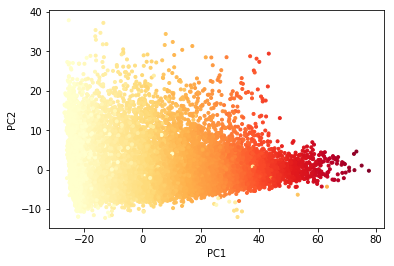

ValueError: x and y must have same first dimension, but have shapes (30527, 2) and (14,)

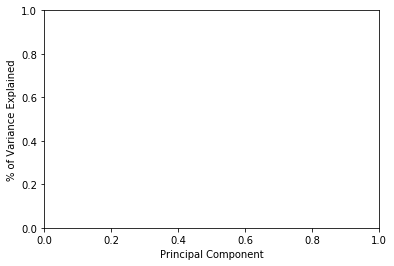

In [206]:
import sklearn
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

noTrackInfo = features.iloc[:,2:]

X_std = StandardScaler().fit_transform(X)

pca = sklearn.decomposition.PCA()
pca.fit(noTrackInfo)
features_pca = pca.transform(noTrackInfo)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(features_pca[:,2], features_pca[:,3], marker=".", c=noTrackInfo["popularity"], cmap="YlOrRd")
plt.show()

plt.xlabel('Principal Component')
plt.ylabel('% of Variance Explained')
plt.plot([i for i in enumerate(noTrackInfo.values)], pca.explained_variance_ratio_)

plt.show()

### Plot each feature against popularity

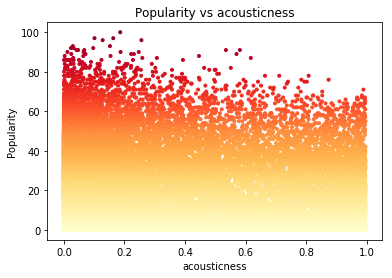

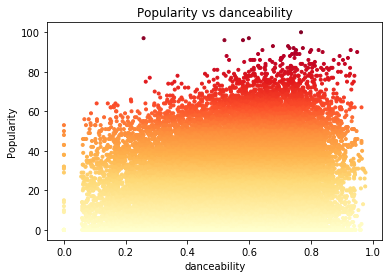

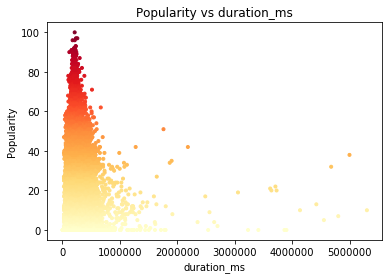

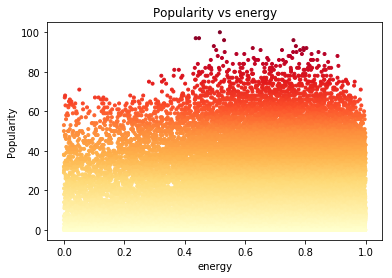

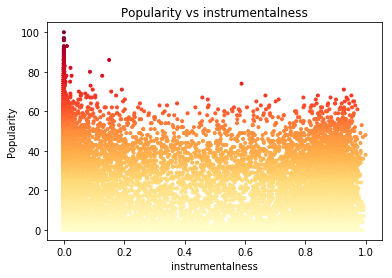

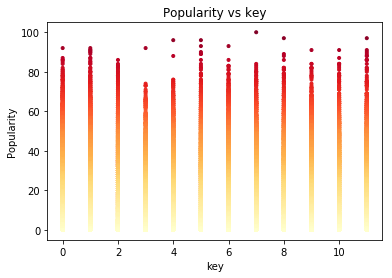

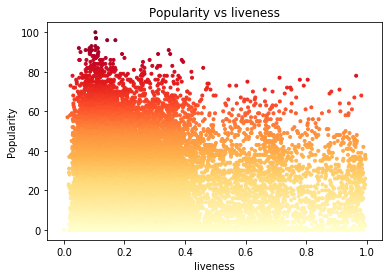

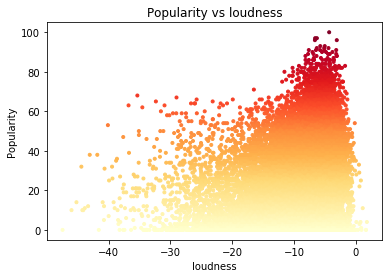

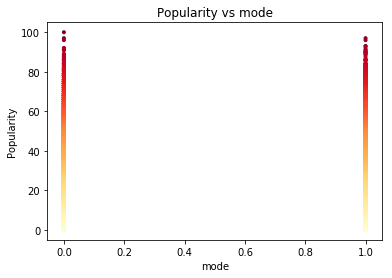

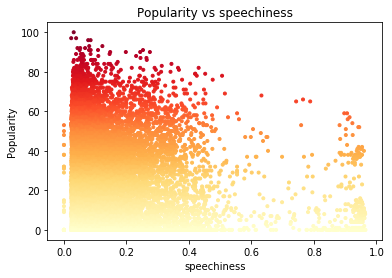

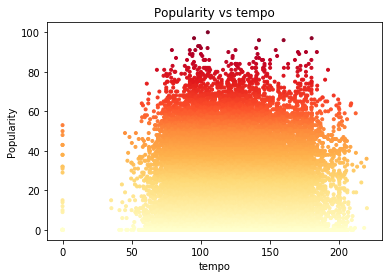

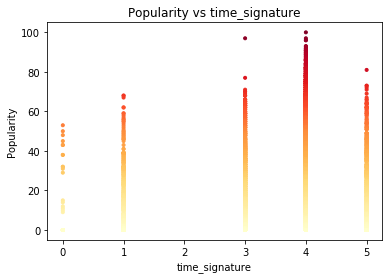

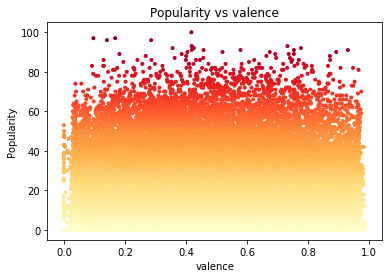

In [217]:
from matplotlib import pyplot as plt
import scipy.stats
# from pylab import polyfit, poly1d
%matplotlib inline

def plotVsPop(feature, reg):
    pop, feat = features["popularity"], features[feature]
    plt.scatter(feat, pop, marker=".", c=pop, cmap="YlOrRd")
    
#     if reg:
#         fit = polyfit(feat, pop, 1)
#         fit_fn = poly1d(fit)
#         plt.plot(feat, pop, '*', feat, fit_fn(feat), 'k', c="b")
        
        
#         m, b, r, p, stderr = scipy.stats.linregress()
#         plt.plot(pop, m*x + b, "-")        
    
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.title('Popularity vs %s' % feature)
    
    plt.show()

for feature in columns[3:]:
    plotVsPop(feature, True)


In [211]:
print features["mode"].value_counts()
print 18928/11599
# 1.7 times as many major


1    18928
0    11599
Name: mode, dtype: int64
1
